# Machine Learning Models

### Prepare the Dataset

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [5]:
df = pd.read_csv('../DB csv files-JB/data_JB11.csv')
df.head()

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Telecommunications,0.002188,0.006114,-0.040141,0.012598,1276900,842100,789000,548700,18.28,...,14.25,17.41,0.014656,238.316,0.14,5.1,41.223333,52.549020,41.219167,1
1,Industrials,0.013942,0.047859,0.005063,0.026507,1245000,1211900,1719800,3425800,20.57,...,-0.20,8.58,0.032956,238.132,0.37,5.0,21.120000,63.988920,21.101250,1
2,Health Care,0.016250,0.005998,0.028423,0.012739,6797433,7929273,6134049,6464902,18.63,...,32.10,29.94,0.016120,260.280,0.09,7.9,81.567800,76.538956,81.946021,0
3,Real Estate,0.025663,0.010003,0.008694,0.029060,330000,383300,634200,393200,84.94,...,9.46,-42.85,0.016492,258.678,1.58,3.5,163.310000,85.086551,163.399583,1
4,Industrials,0.067447,-0.050203,0.049677,-0.010322,1888300,1093800,1122400,1217600,-13.71,...,10.82,22.32,0.026272,260.474,0.09,6.7,77.210000,93.447738,76.892083,0


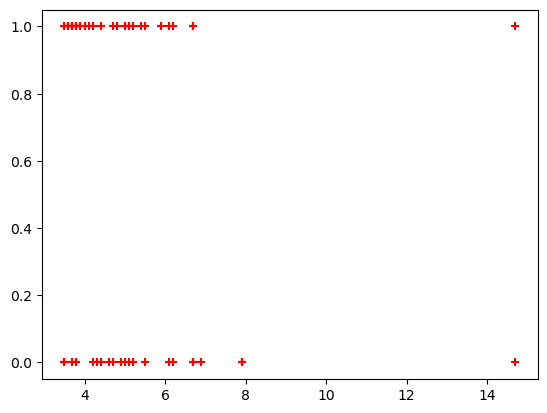

In [9]:
plt.scatter(df.unemployment_rate, df.label, marker='+', color='red')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['unemployment_rate']], df.label, test_size=0.2, random_state = 1234)

In [14]:
X_test

,unemployment_rate
21,3.9
31,4.4
32,5.9
8,6.9
6,14.7
22,4.6
18,3.6
20,4.8
55,3.5
42,6.7


In [15]:
X_train

,unemployment_rate
29,14.7
35,3.7
4,6.7
13,3.5
56,3.7
59,3.5
25,6.1
10,3.5
7,5.2
46,3.7


## Fit Models
Now we will test a range of models. In each we will fit the model in the train data, make predictons for the test data and obtain the accuracy. In later steps we will compare the accuracy of all the models. We will use primarily the library ```sklearn```

### Logistics Regression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [22]:
model.score(X_test, y_test)

0.46153846153846156

In [ ]:
model.predict_proba(X_test)

In [28]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.46153846153846156


### Linear Discrimant Analysis

In [33]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.46153846153846156


### Neural Network

In [36]:
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.6153846153846154


## Compare Results

In [39]:
accuracy_list = [Accuracy_LR, Accuracy_LDA, Accuracy_MLP]

model_list = ['Logistic Regression', 'Linear Discriminat','Neural Network']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

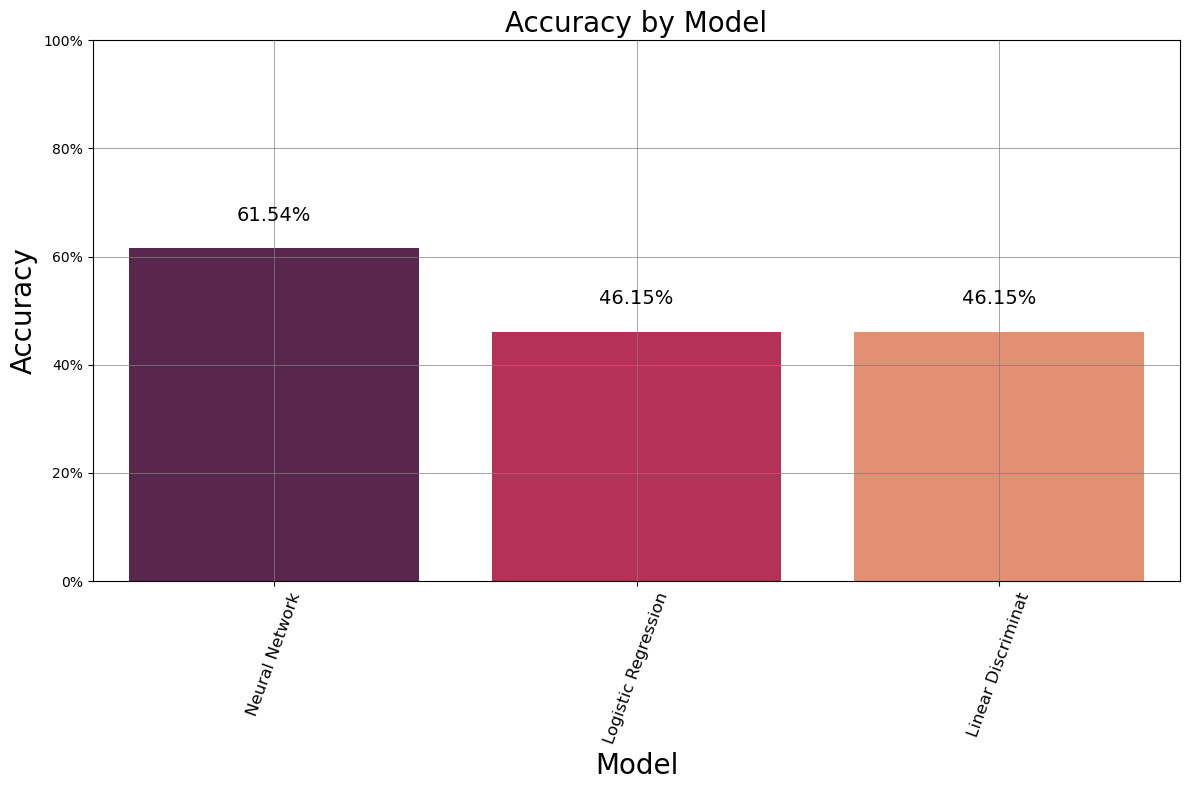

In [45]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

#y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
#ax.set_yticklabels(y_value)

plt.tight_layout()